In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

train_pca = pd.read_csv("./data_frames/train_pca.csv",usecols=range(1,6))
train_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.754399,1.751019,-0.783098,-0.632242,0.484527
1,-2.335371,0.748540,-0.088715,-0.561861,0.747871
2,-1.263251,1.192971,-0.063963,-0.033535,0.070880
3,-1.310766,2.241533,-0.588520,-0.055770,0.299381
4,-1.248747,1.315912,0.014555,1.098989,0.224060
...,...,...,...,...,...
34437,2.563398,1.719664,-0.135926,0.456149,-0.530828
34438,-0.429961,0.091013,0.434390,1.106230,-0.699905
34439,0.712204,-0.027652,0.560340,-0.316136,-0.141787
34440,2.229300,0.298581,0.460838,-0.536680,-0.797634


In [4]:
bandwidth = estimate_bandwidth(train_pca, quantile=0.005, n_samples=5000, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, cluster_all=True, n_jobs=-1)
ms.fit(train_pca)
train_pca['LabelsQuan005'] = ms.labels_

bandwidth = estimate_bandwidth(train_pca, quantile=0.01, n_samples=5000, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, cluster_all=True, n_jobs=-1)
ms.fit(train_pca)
train_pca['LabelsQuan01'] = ms.labels_

bandwidth = estimate_bandwidth(train_pca, quantile=0.05, n_samples=5000, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, cluster_all=True, n_jobs=-1)
ms.fit(train_pca)
train_pca['LabelsQuan05'] = ms.labels_

bandwidth = estimate_bandwidth(train_pca, quantile=0.25, n_samples=5000, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, cluster_all=True, n_jobs=-1)
ms.fit(train_pca)
train_pca['LabelsQuan25'] = ms.labels_

In [17]:
train_pca

,PC1,PC2,PC3,PC4,PC5,LabelsQuan001,LabelsQuan01,LabelsQuan05,LabelsQuan25,LabelsQuan005
0,-1.754399,1.751019,-0.783098,-0.632242,0.484527,51,1,0,0,3
1,-2.335371,0.748540,-0.088715,-0.561861,0.747871,115,4,0,0,9
2,-1.263251,1.192971,-0.063963,-0.033535,0.070880,51,1,0,0,3
3,-1.310766,2.241533,-0.588520,-0.055770,0.299381,51,1,0,0,3
4,-1.248747,1.315912,0.014555,1.098989,0.224060,23,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
34437,2.563398,1.719664,-0.135926,0.456149,-0.530828,284,3,1,0,18
34438,-0.429961,0.091013,0.434390,1.106230,-0.699905,21,0,0,0,1
34439,0.712204,-0.027652,0.560340,-0.316136,-0.141787,144,4,1,0,12
34440,2.229300,0.298581,0.460838,-0.536680,-0.797634,226,8,1,0,19


# Visualization of Clusters

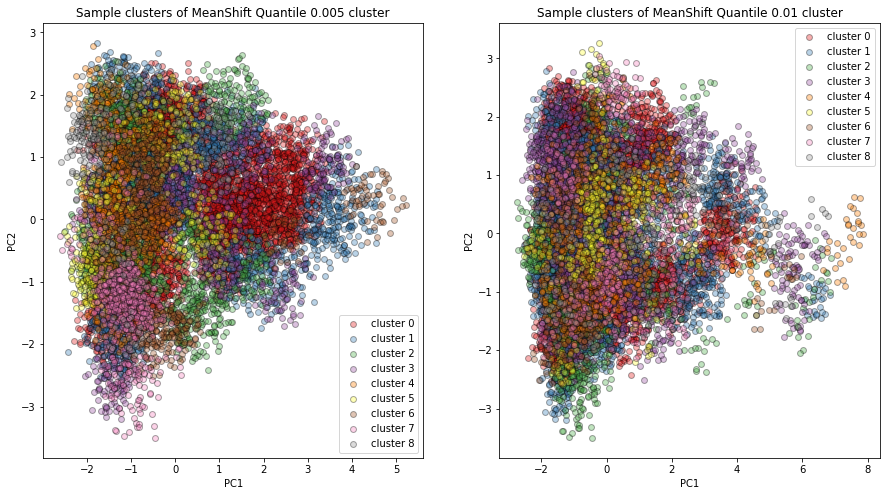

In [24]:
#https://colorbrewer2.org/?type=qualitative&scheme=Set1&n=9
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for i in range(0,9):
    plt.scatter(
        train_pca[(train_pca['LabelsQuan005'] == i+1)]['PC1'], 
        train_pca[(train_pca['LabelsQuan005'] == i+1)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of MeanShift Quantile 0.005 cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.subplot(1,2,2)
for i in range(0,9):
    plt.scatter(
        train_pca[(train_pca['LabelsQuan01'] == i+1)]['PC1'], 
        train_pca[(train_pca['LabelsQuan01'] == i+1)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of MeanShift Quantile 0.01 cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.show()

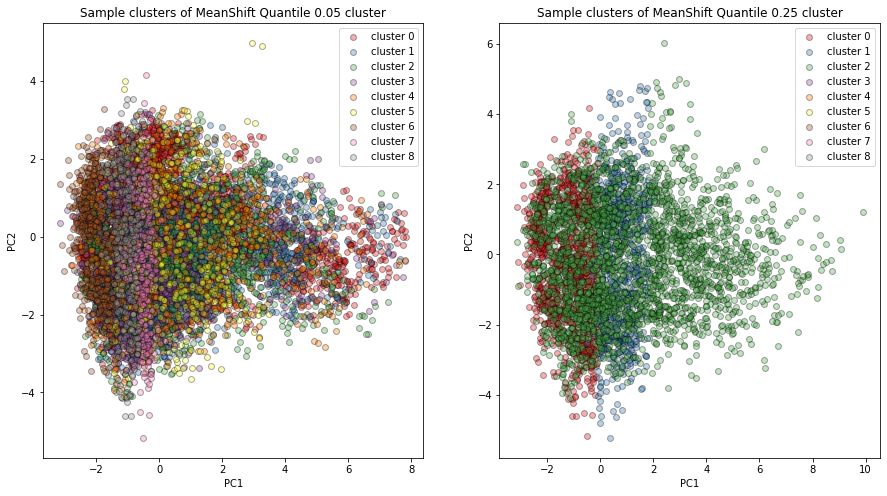

In [6]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for i in range(0,9):
    plt.scatter(
        train_pca[(train_pca['LabelsQuan05'] == i+1)]['PC1'], 
        train_pca[(train_pca['LabelsQuan05'] == i+1)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of MeanShift Quantile 0.05 cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.subplot(1,2,2)
for i in range(0,9):
    plt.scatter(
        train_pca[(train_pca['LabelsQuan25'] == i+1)]['PC1'], 
        train_pca[(train_pca['LabelsQuan25'] == i+1)]['PC2'],
        s=35, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i),
        alpha=0.35
    )

plt.title("Sample clusters of MeanShift Quantile 0.25 cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.show()

# Visualization of Cluster Sizes

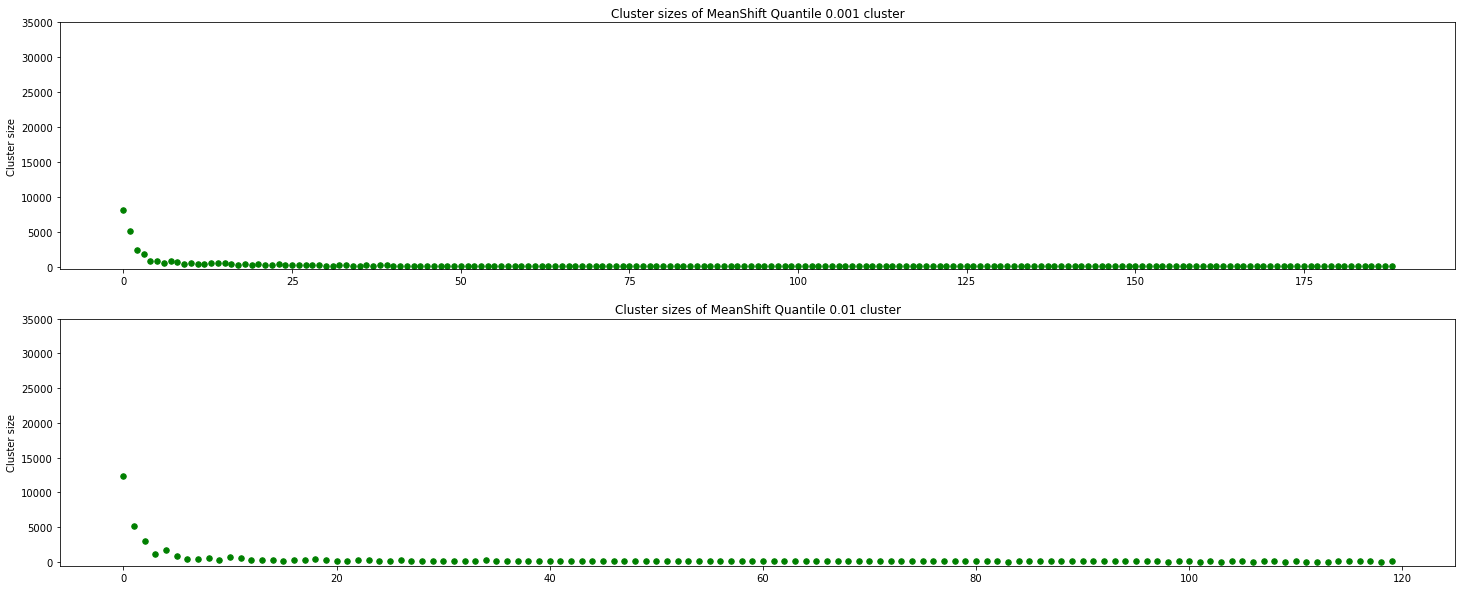

In [28]:
lab005 = pd.unique(train_pca.LabelsQuan005); lab005.sort()
lab01 = pd.unique(train_pca.LabelsQuan01); lab01.sort()
lab05 = pd.unique(train_pca.LabelsQuan05); lab05.sort()
lab25 = pd.unique(train_pca.LabelsQuan25); lab25.sort()
sizes005 = []; sizes01 = []; sizes05 = []; sizes25 = []

for e005 in lab005:
    sizes005.append(len(train_pca[train_pca.LabelsQuan005==e005]))
for e01 in lab01:
    sizes01.append(len(train_pca[train_pca.LabelsQuan01==e01]))
for e05 in lab05:
    sizes05.append(len(train_pca[train_pca.LabelsQuan05==e05]))
for e25 in lab25:
    sizes25.append(len(train_pca[train_pca.LabelsQuan25==e25]))

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.scatter(lab005, sizes005, s=30, c='g', marker="o", label='Quantile 0.005')

plt.ylabel("Cluster size")
plt.title("Cluster sizes of MeanShift Quantile 0.001 cluster")
plt.yticks(np.arange(0, 35500, 5000))

plt.subplot(2,1,2)
plt.scatter(lab01, sizes01, s=30, c='g', marker="o", label='Quantile 0.01')

plt.ylabel("Cluster size")
plt.title("Cluster sizes of MeanShift Quantile 0.01 cluster")
plt.yticks(np.arange(0, 35500, 5000))

plt.show()

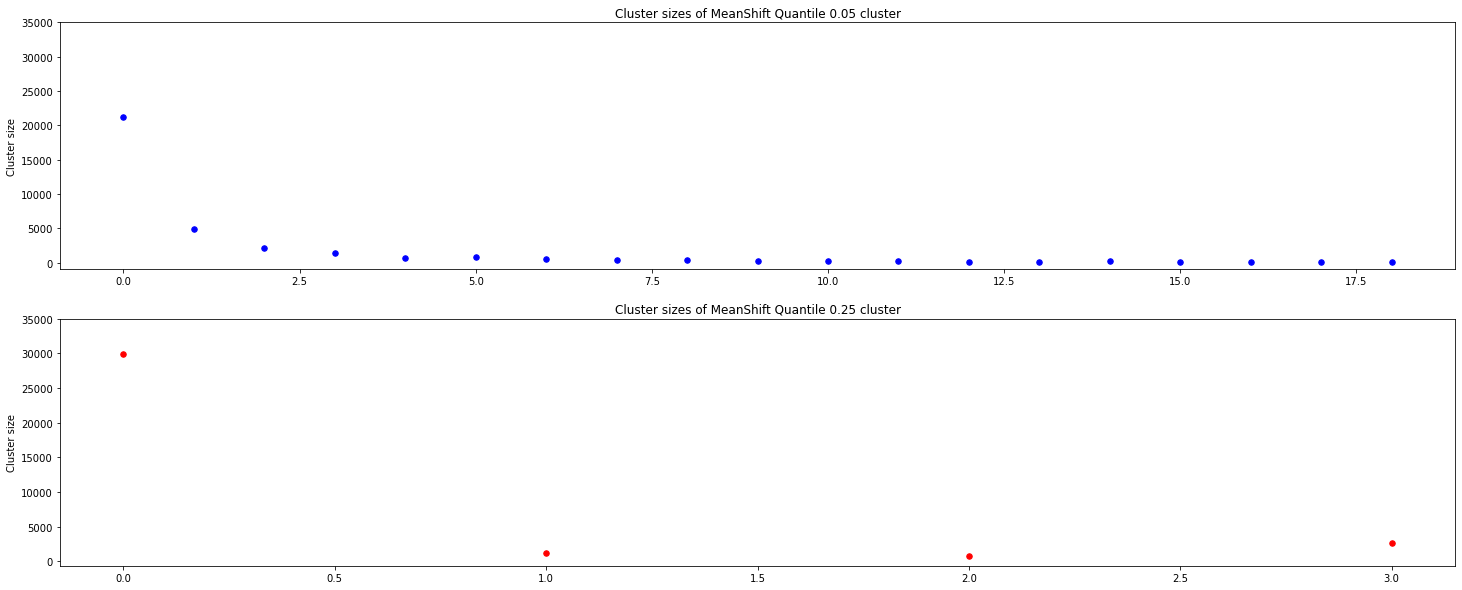

In [29]:
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.scatter(lab05, sizes05, s=30, c='b', marker="o", label='Quantile 0.05')

plt.ylabel("Cluster size")
plt.title("Cluster sizes of MeanShift Quantile 0.05 cluster")
plt.yticks(np.arange(0, 35500, 5000))

plt.subplot(2,1,2)
plt.scatter(lab25, sizes25, s=30, c='r', marker="o", label='Quantile 0.25')

plt.ylabel("Cluster size")
plt.title("Cluster sizes of MeanShift Quantile 0.25 cluster")
plt.yticks(np.arange(0, 35500, 5000))

plt.show()

# Evaluation of Cohesion / Separation

In [31]:
from sklearn.metrics import silhouette_score

X = train_pca[['PC1','PC2','PC3','PC4','PC5']]
print("005:",silhouette_score(X, train_pca['LabelsQuan005']))
print("01:",silhouette_score(X, train_pca['LabelsQuan01']))
print("05:",silhouette_score(X, train_pca['LabelsQuan05']))
print("25:",silhouette_score(X, train_pca['LabelsQuan25']))

005: -0.12538389564320881
01: -0.09780714074492913
05: 0.04893475249604452
25: 0.14434150027864687
